In [1]:
import pandas as pd
import numpy as np
from numpy import *

from datetime import datetime
from datetime import timedelta
from pandas import Series

import warnings

# Chart tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.offline as pyoff
import plotly.tools as tls
import plotly.graph_objs as go
import pydotplus

# Machine learning tools
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, tree
from sklearn.metrics import log_loss, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from scipy import sparse

# Keras for deep learning
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

# keras default parameters: alpha or lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0.

## Performance measures
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv', index_col=0)

train['Split'] = 'Train'
test['Split'] = 'Test'

In [3]:
train_original = train.copy()
test_original = test.copy ()

In [4]:
train.columns, test.columns

#train data has 1 more column, weekly sales

(Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
        'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
        'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Split'],
       dtype='object'),
 Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
        'Unemployment', 'Type', 'Size', 'Split'],
       dtype='object'))

In [5]:
train.dtypes, test.dtypes

(Store             int64
 Dept              int64
 Date             object
 Weekly_Sales    float64
 IsHoliday          bool
 Temperature     float64
 Fuel_Price      float64
 MarkDown1       float64
 MarkDown2       float64
 MarkDown3       float64
 MarkDown4       float64
 MarkDown5       float64
 CPI             float64
 Unemployment    float64
 Type             object
 Size              int64
 Split            object
 dtype: object, Store             int64
 Dept              int64
 Date             object
 IsHoliday          bool
 Temperature     float64
 Fuel_Price      float64
 MarkDown1       float64
 MarkDown2       float64
 MarkDown3       float64
 MarkDown4       float64
 MarkDown5       float64
 CPI             float64
 Unemployment    float64
 Type             object
 Size              int64
 Split            object
 dtype: object)

In [6]:
train.shape, test.shape

#more records in train dataset than test datasetsa

((282451, 17), (139119, 16))

In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,Train
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,Train
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,Train
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,Train
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,Train


In [8]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,Test
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,Test
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,Test
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,Test
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,Test


In [9]:
train.dtypes, test.dtypes

(Store             int64
 Dept              int64
 Date             object
 Weekly_Sales    float64
 IsHoliday          bool
 Temperature     float64
 Fuel_Price      float64
 MarkDown1       float64
 MarkDown2       float64
 MarkDown3       float64
 MarkDown4       float64
 MarkDown5       float64
 CPI             float64
 Unemployment    float64
 Type             object
 Size              int64
 Split            object
 dtype: object, Store             int64
 Dept              int64
 Date             object
 IsHoliday          bool
 Temperature     float64
 Fuel_Price      float64
 MarkDown1       float64
 MarkDown2       float64
 MarkDown3       float64
 MarkDown4       float64
 MarkDown5       float64
 CPI             float64
 Unemployment    float64
 Type             object
 Size              int64
 Split            object
 dtype: object)

In [10]:
df = pd.concat([train,test],axis=0) # Join train and test
df.describe()

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,282451.000000
mean,171.201947,44.260317,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739,22.200546,60.090059,7.960289,15983.429692
std,39.159276,30.492054,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328,12.785297,18.447931,1.863296,22661.092494
min,126.064000,1.000000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000,1.000000,-2.060000,3.879000,-4988.940000
25%,132.022667,18.000000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000,11.000000,46.680000,6.891000,2079.330000
50%,182.318780,37.000000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000,22.000000,62.090000,7.866000,7616.550000
75%,212.416993,74.000000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000,33.000000,74.280000,8.572000,20245.745000
max,227.232807,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,45.000000,100.140000,14.313000,693099.360000


In [11]:
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')

In [12]:
df.head()
df['Split'].value_counts()

Train    282451
Test     139119
Name: Split, dtype: int64

In [13]:
sns.set(style = 'white')

In [14]:
#compute correlation
corr = df.corr()

In [15]:
#build mask for upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

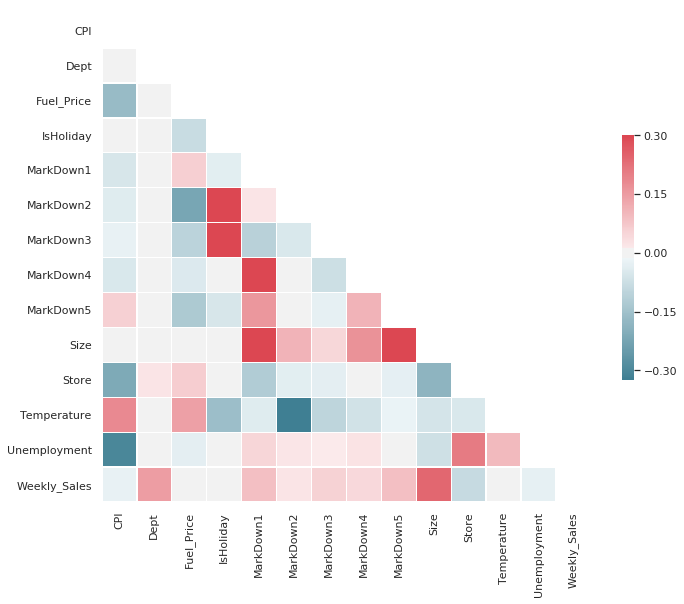

In [16]:
f, ax = plt.subplots(figsize = (11, 9))

#generate custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap = True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [17]:
def scatterplots (feature, label):
    x = feature
    y = df['Weekly_Sales']
    plt.scatter(x,y)
    plt.xlabel(label)
    plt.ylabel('Sales')
    plt.show()

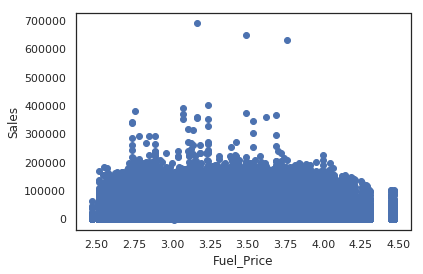

In [18]:
%matplotlib inline

scatterplots(df['Fuel_Price'], 'Fuel_Price')

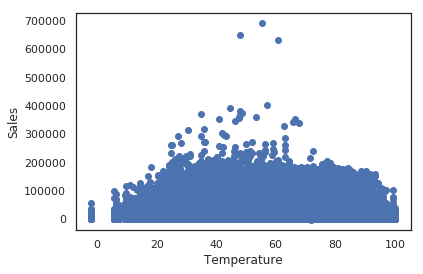

In [19]:
scatterplots(df['Temperature'], 'Temperature')

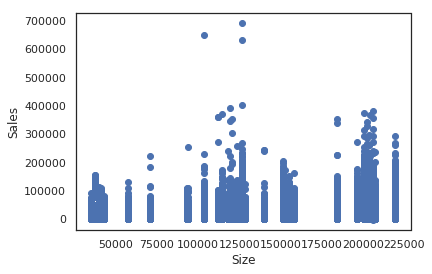

In [20]:
scatterplots(df['Size'], 'Size')

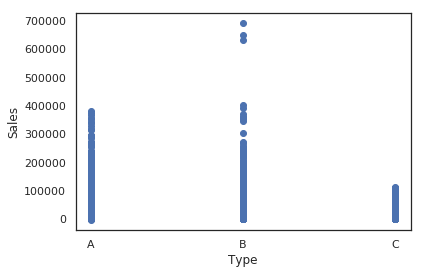

In [21]:
scatterplots(df['Type'], 'Type')

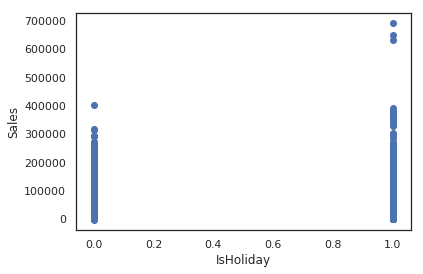

In [22]:
scatterplots(df['IsHoliday'], 'IsHoliday')

In [23]:
df.loc[df['Weekly_Sales'] > 300000]

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
29352,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,114533,Train,23,34.95,B,5.287,369830.98
41292,210.515277,2010-11-26,72,2.735,True,NaN,NaN,NaN,NaN,NaN,184109,Train,39,67.75,A,8.476,339700.62
66187,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,120653,Train,18,40.81,B,9.331,353008.64
83588,129.836400,2011-11-25,72,3.760,True,174.72,329.00,141630.61,79.00,1009.98,126512,Train,10,60.68,B,7.874,630999.19
93294,126.669267,2010-11-26,72,2.752,True,NaN,NaN,NaN,NaN,NaN,205863,Train,4,48.08,A,7.127,381072.11
97641,126.983581,2010-12-24,72,3.236,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,57.06,B,9.003,404245.03
116197,140.421786,2011-11-25,72,3.689,True,164.01,27.47,73934.06,24.22,540.56,204184,Train,27,47.88,A,7.906,368484.19
121958,126.669267,2010-11-26,72,3.162,True,NaN,NaN,NaN,NaN,NaN,112238,Train,12,47.66,B,14.313,359995.60
140076,140.421786,2011-11-25,72,3.536,True,1649.31,NaN,70087.94,7.50,5266.90,119557,Train,22,46.28,B,7.706,345532.23
150574,136.478800,2011-11-25,72,3.536,True,748.82,46.00,71366.86,19.00,577.40,120653,Train,18,41.97,B,8.471,305161.38


In [24]:
df.loc[df['Weekly_Sales'] > 300000,"Date"].value_counts()

2010-11-26    9
2011-11-25    9
2010-12-24    2
2011-12-23    1
Name: Date, dtype: int64

In [25]:
#interesting correlations between unemployment and temperature, department number and weekly sales

#need to fill in blank data
df.isnull().sum()

CPI                  0
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Split                0
Store                0
Temperature          0
Type                 0
Unemployment         0
Weekly_Sales    139119
dtype: int64

In [26]:
# Make a feature which indicates whether a certain markdown was active at all

df = df.assign(md1_present = df.MarkDown1.notnull())
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())

In [27]:
# fill each missing value with 0. 
# for markdowns, this means there was no markdown. for the weekly sales, these are the ones we have to predict.

df.fillna(0, inplace = True)

In [28]:
#create some dummy variables for categorical data

#First, make sure we can later recognize what a dummy once belonged to
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)
df['IsHoliday'] = 'IsHoliday_' + df['IsHoliday'].map(str)

In [29]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Store,Temperature,Type,Unemployment,Weekly_Sales,md1_present,md2_present,md3_present,md4_present,md5_present
0,136.213613,2011-08-26,Dept_92,3.796,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,Store_26,61.10,Type_A,7.767,87235.57,False,False,False,False,False
1,128.616064,2011-03-25,Dept_22,3.480,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,Store_34,53.11,Type_A,10.398,5945.97,False,False,False,False,False
2,211.265543,2010-12-03,Dept_28,2.708,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,Store_21,50.43,Type_B,8.163,1219.89,False,False,False,False,False
3,214.878556,2010-09-17,Dept_9,2.582,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,Store_8,75.32,Type_A,6.315,11972.71,False,False,False,False,False
4,138.106581,2012-05-18,Dept_55,4.029,IsHoliday_False,12613.98,0.0,11.5,1705.28,3600.79,...,Store_19,58.81,Type_A,8.150,8271.82,True,False,True,True,True


In [30]:
#Second, create the dummies

type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
isholiday_dummies = pd.get_dummies(df['IsHoliday'])

# Create dummies for each month
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] = 'Month_' + df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [31]:
# Dummies for special dates
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')

df['Pre_Christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')

df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)

df['Pre_Christmas'] = 'Pre_Christmas_' + df['Pre_Christmas'].map(str)

Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )

Pre_Christmas_dummies = pd.get_dummies(df['Pre_Christmas'] )

In [32]:
df = pd.concat([df, isholiday_dummies, Black_Friday_dummies, Pre_Christmas_dummies], axis = 1)

In [33]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,DateType,Month,Black_Friday,Pre_Christmas,IsHoliday_False,IsHoliday_True,Black_Friday_no,Black_Friday_yes,Pre_Christmas_no,Pre_Christmas_yes
0,136.213613,2011-08-26,Dept_92,3.796,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,2011-08-26,Month_8,Black_Friday_no,Pre_Christmas_no,1,0,1,0,1,0
1,128.616064,2011-03-25,Dept_22,3.480,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,2011-03-25,Month_3,Black_Friday_no,Pre_Christmas_no,1,0,1,0,1,0
2,211.265543,2010-12-03,Dept_28,2.708,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,2010-12-03,Month_12,Black_Friday_no,Pre_Christmas_no,1,0,1,0,1,0
3,214.878556,2010-09-17,Dept_9,2.582,IsHoliday_False,0.00,0.0,0.0,0.00,0.00,...,2010-09-17,Month_9,Black_Friday_no,Pre_Christmas_no,1,0,1,0,1,0
4,138.106581,2012-05-18,Dept_55,4.029,IsHoliday_False,12613.98,0.0,11.5,1705.28,3600.79,...,2012-05-18,Month_5,Black_Friday_no,Pre_Christmas_no,1,0,1,0,1,0


In [34]:
#get medians by store, by type, and by dept
medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,Dept_1,Store_1,Month_1,IsHoliday_False,16894.400
1,Type_A,Dept_1,Store_1,Month_10,IsHoliday_False,29279.120
2,Type_A,Dept_1,Store_1,Month_11,IsHoliday_False,19300.025
3,Type_A,Dept_1,Store_1,Month_11,IsHoliday_True,19865.770
4,Type_A,Dept_1,Store_1,Month_12,IsHoliday_False,44912.860


In [35]:
# Merge by type, store, department and month

df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])

In [36]:
# Fill NA

df['Median Sales'].fillna(df['Median Sales'].loc[df['Split'] == 'Train'].median(), inplace = True)

# Create a key for easy access

df['Key'] = df['Type'].map(str) + df['Dept'].map(str) + df['Store'].map(str) + df['Date'].map(str) + df['IsHoliday'].map(str)

In [37]:
# Lagged variable of store's previous weeks sales

# First create a column with a one week lag
df['DateLagged'] = df['Date'] - timedelta(days = 7)
df.columns

Index(['CPI', 'Date', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Split',
       'Store', 'Temperature', 'Type', 'Unemployment', 'Weekly_Sales',
       'md1_present', 'md2_present', 'md3_present', 'md4_present',
       'md5_present', 'DateType', 'Month', 'Black_Friday', 'Pre_Christmas',
       'IsHoliday_False', 'IsHoliday_True', 'Black_Friday_no',
       'Black_Friday_yes', 'Pre_Christmas_no', 'Pre_Christmas_yes',
       'Median Sales', 'Key', 'DateLagged'],
      dtype='object')

In [38]:
# Next, create a sorted dataframe. This will allow us to find lagged variables faster

sorted_df = df.sort_values(['Store', 'Dept', 'Date'], ascending = [1,1,1])
sorted_df = sorted_df.reset_index(drop = True) # Reinitialize the row indices for the loop to work

In [39]:
# Loop over its rows and check at each step if the previous week's sales are available. 
# If not, fill with store and department average, which we retrieved before.

sorted_df['LaggedSales'] = np.nan #initialize columns
sorted_df['LaggedAvailable'] = np.nan
last = df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row['DateLagged']
    
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    
    if ((last['Date'] == lag_date) & (last['Weekly_Sales'] > 0)):
        sorted_df.set_value(index, 'LaggedSales', last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable', 1)
    else:
        sorted_df.set_value(index, 'LaggedSales', row['Median Sales']) #fill with median sales
        sorted_df.set_value(index, 'LaggedAvailable', 0)
    
    last = row #remember last row for speed
    if(index%int(row_len/10)==0):
        print(str(int(index*100/row_len))+'% loaded')

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/asun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [40]:
sorted_df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,20124.22,0.00,20124.220
1,Dept_1,Store_1,2010-02-12,41513.99,46039.49,41513.990
2,Dept_1,Store_1,2010-02-19,46039.49,0.00,20124.220
3,Dept_1,Store_1,2010-02-26,20124.22,19403.54,20124.220
4,Dept_1,Store_1,2010-03-05,19403.54,21827.90,20962.245


In [41]:
# Next, merge sorted dataframe with exisiting database

df = df.merge(sorted_df[['Dept', 'Store', 'Date', 'LaggedSales', 'LaggedAvailable']], how = 'inner', on = ['Dept', 'Store', 'Date'])

In [42]:
df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales', 'Sales_dif']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales,Sales_dif
0,Dept_92,Store_26,2011-08-26,93212.89,87235.57,93212.89,0.00
1,Dept_92,Store_26,2012-08-24,93212.89,88145.09,93212.89,0.00
2,Dept_92,Store_26,2011-08-05,80427.06,96906.53,93212.89,12785.83
3,Dept_92,Store_26,2012-08-10,93890.07,111812.56,93212.89,-677.18
4,Dept_92,Store_26,2012-08-17,111812.56,93212.89,93212.89,-18599.67


In [43]:
# Remove redundant items

# Take store average in the available data as one of its properties

switch = 1

if(switch):
    df_backup = df
else:
    df = df_backup
    display(df_backup.head())

In [44]:
# Scale variables

# To make the job of our models easier in the next phase, we normalize our continous data. 
# This is also called feature scaling.

#df['Unemployment'] = (df['Unemployment'] - df['Unemployment'].mean())/(df['Unemployment'].std())
#df['Temperature'] = (df['Temperature'] - df['Temperature'].mean())/(df['Temperature'].std())
#df['Fuel_Price'] = (df['Fuel_Price'] - df['Fuel_Price'].mean())/(df['Fuel_Price'].std())
#df['CPI'] = (df['CPI'] - df['CPI'].mean())/(df['CPI'].std())
#df['MarkDown1'] = (df['MarkDown1'] - df['MarkDown1'].mean())/(df['MarkDown1'].std())
#df['MarkDown2'] = (df['MarkDown2'] - df['MarkDown2'].mean())/(df['MarkDown2'].std())
#df['MarkDown3'] = (df['MarkDown3'] - df['MarkDown3'].mean())/(df['MarkDown3'].std())
#df['MarkDown4'] = (df['MarkDown4'] - df['MarkDown4'].mean())/(df['MarkDown4'].std())
#df['MarkDown5'] = (df['MarkDown5'] - df['MarkDown5'].mean())/(df['MarkDown5'].std())
#df['LaggedSales']= (df['LaggedSales'] - df['LaggedSales'].mean())/(df['LaggedSales'].std())

# let's change the variable to be forecasted to the difference from the median.
df['Difference'] = df['Median Sales'] - df['Weekly_Sales']


In [45]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday_yes,Pre_Christmas_no,Pre_Christmas_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,136.213613,2011-08-26,Dept_92,3.796,IsHoliday_False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.89,0.0,0.00,5977.32
1,138.281452,2012-08-24,Dept_92,3.874,IsHoliday_False,4507.08,33.6,149.46,1866.46,4685.63,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.89,1.0,0.00,5067.80
2,136.054032,2011-08-05,Dept_92,3.903,IsHoliday_False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.06,1.0,12785.83,-3693.64
3,138.143774,2012-08-10,Dept_92,3.772,IsHoliday_False,5732.23,17.6,6.45,1524.63,2439.95,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.07,1.0,-677.18,-18599.67
4,138.185710,2012-08-17,Dept_92,3.840,IsHoliday_False,2430.95,16.0,5.54,829.70,3038.77,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.56,1.0,-18599.67,0.00


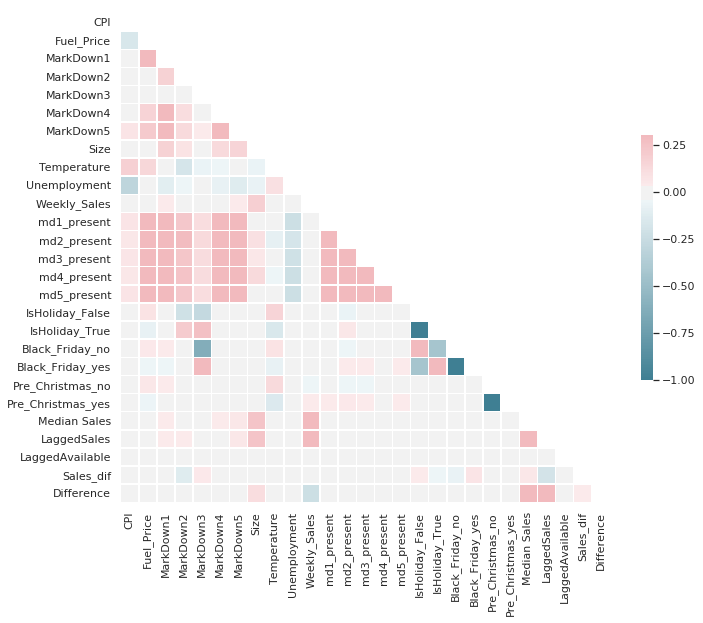

In [46]:
sns.set(style = 'white')

# Compute correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',
    
    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_Christmas_no',
    'Pre_Christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]
display(df[selector].describe())
display(df[selector].head())

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,IsHoliday_False,IsHoliday_True,Pre_Christmas_no,Pre_Christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,171.201947,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,136727.915739,60.090059,7.960289,0.929642,0.070358,0.985808,0.014192,0.985865,0.014135,15907.380029,-179.734399,0.655172
std,39.159276,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,60980.583328,18.447931,1.863296,0.255750,0.255750,0.118283,0.118283,0.118049,0.118049,22521.689433,5538.988872,0.475313
min,126.064000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,34875.000000,-2.060000,3.879000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-526108.280000,0.000000
25%,132.022667,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.000000,46.680000,6.891000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2114.310000,-118.608750,0.000000
50%,182.318780,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.000000,62.090000,7.866000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7583.440000,0.000000,1.000000
75%,212.416993,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,202505.000000,74.280000,8.572000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20107.905000,114.821250,1.000000
max,227.232807,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,100.140000,14.313000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693099.360000,557005.550000,1.000000


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,md5_present,IsHoliday_False,IsHoliday_True,Pre_Christmas_no,Pre_Christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,136.213613,3.796,0.00,0.0,0.00,0.00,0.00,152513,61.10,7.767,...,False,1,0,1,0,1,0,93212.89,0.00,0.0
1,138.281452,3.874,4507.08,33.6,149.46,1866.46,4685.63,152513,62.08,7.405,...,True,1,0,1,0,1,0,93212.89,0.00,1.0
2,136.054032,3.903,0.00,0.0,0.00,0.00,0.00,152513,63.16,7.767,...,False,1,0,1,0,1,0,80427.06,12785.83,1.0
3,138.143774,3.772,5732.23,17.6,6.45,1524.63,2439.95,152513,67.01,7.405,...,True,1,0,1,0,1,0,93890.07,-677.18,1.0
4,138.185710,3.840,2430.95,16.0,5.54,829.70,3038.77,152513,65.54,7.405,...,True,1,0,1,0,1,0,111812.56,-18599.67,1.0


In [48]:
# Split data into training and test sets

train = df.loc[df['Split'] == 'Train']
test = df.loc[df['Split'] == 'Test']

test.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday_yes,Pre_Christmas_no,Pre_Christmas_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
7,132.661613,2010-08-20,Dept_92,2.796,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_ADept_92Store_262010-08-20 00:00:00IsHoli...,2010-08-13,80498.48,1.0,12714.41,93212.89
8,136.144129,2011-08-12,Dept_92,3.880,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-12 00:00:00IsHoli...,2011-08-05,96906.53,1.0,-3693.64,93212.89
9,132.614193,2010-08-06,Dept_92,2.792,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_ADept_92Store_262010-08-06 00:00:00IsHoli...,2010-07-30,93212.89,0.0,0.00,93212.89
10,132.693226,2010-08-27,Dept_92,2.770,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_ADept_92Store_262010-08-27 00:00:00IsHoli...,2010-08-20,93212.89,0.0,0.00,93212.89
11,136.183129,2011-08-19,Dept_92,3.820,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-19 00:00:00IsHoli...,2011-08-12,93212.89,0.0,0.00,93212.89


In [49]:
# Split our training set into 2 so that we could test out sample performance
# Use 20% of our training set for this sanity check

#set seed for reproducability
np.random.seed(42)

X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Difference'], test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_dev.shape)
print(y_dev.shape)


(225960, 24)
(225960,)
(56491, 24)
(56491,)


In [50]:
# Train on random forest:

# Random forest model specification
regr = RandomForestRegressor(n_estimators = 20, criterion = 'mse', max_depth = None,
                            min_samples_split = 2, min_samples_leaf = 1,
                            min_weight_fraction_leaf = 0.0, max_features = 'auto',
                            max_leaf_nodes = None, min_impurity_decrease = 0.0,
                            min_impurity_split = None, bootstrap = True,
                            oob_score = False, n_jobs = 1, random_state = None,
                            verbose = 2, warm_start = False)
# Train on data
regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [51]:
# Evaluate the model

y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.0s finished


In [52]:
# Transform forest predictions to observe direction of change

def binary(movement): #converts percentage change to a binary 1 or 0, where 1 is an increase, and 0 is a decrease/no change
    
    #initiate empty arrays where a 1 represents increase and a 0 represents a decrease
    direction = np.empty(movement.shape[0])
    
    #if the change in price is greater than zero, store it as a 1
    #if the change in price is 0 or less than zero, store it as a 0
    
    for i in range(movement.shape[0]):
        if movement[i] > 0:
            direction[i] = 1
        else:
            direction[i] = 0
    return direction

In [53]:
direction_true1 = binary(y_dev.values)
direction_predict = binary(y_pred_random)

# Convert to pd series type for confusion matrix
direction_true1 = pd.DataFrame(direction_true1).stack()
direction_predict = pd.DataFrame(direction_predict).stack()


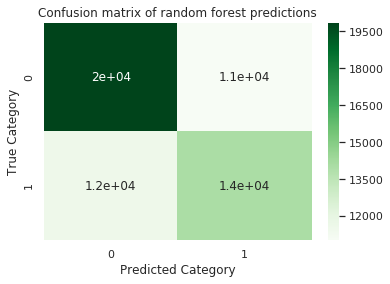

In [54]:
# Create a confusion matrix random forest
cnf_mtrx = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_mtrx, ax=ax, cmap=plt.cm.Greens, annot=True)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.show()

In [55]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_Christmas_no,Pre_Christmas_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
6,132.630000,2010-08-13,Dept_92,2.810,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,1,0,93212.890,Type_ADept_92Store_262010-08-13 00:00:00IsHoli...,2010-08-06,93212.890,0.0,0.000,12714.410,-2015.11525
17,126.606645,2010-03-19,Dept_22,2.743,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,1,0,6325.505,Type_ADept_22Store_342010-03-19 00:00:00IsHoli...,2010-03-12,6325.505,0.0,0.000,625.475,-226.05375
18,130.896645,2012-03-23,Dept_22,3.759,IsHoliday_False,3662.39,107.42,0.59,941.47,1934.93,...,1,0,6325.505,Type_ADept_22Store_342012-03-23 00:00:00IsHoli...,2012-03-16,6325.505,0.0,0.000,296.905,343.71400
27,211.064660,2010-12-24,Dept_28,2.886,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,1340.680,Type_BDept_28Store_212010-12-24 00:00:00IsHoli...,2010-12-17,1559.650,1.0,-218.970,-341.880,-297.35150
35,226.161598,2012-09-14,Dept_9,3.717,IsHoliday_False,4678.98,0.00,12.29,1130.96,5427.34,...,1,0,13385.715,Type_ADept_9Store_82012-09-14 00:00:00IsHolida...,2012-09-07,23918.090,1.0,-10532.375,-2654.665,-5130.32450


In [56]:
# http://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html

def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()

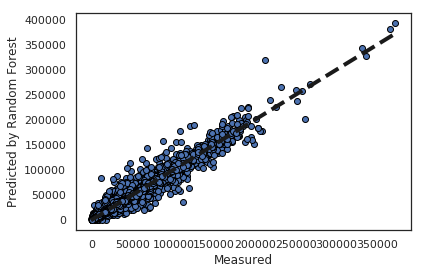

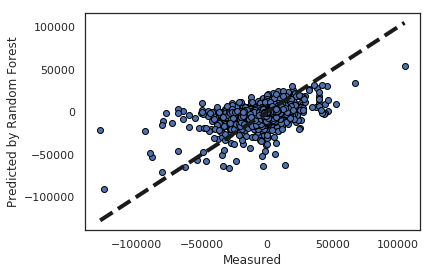

In [57]:
df_out['Prediction'] = df_out['Median Sales'] - df_out['Predicted']

plot_prediction(df_out['Weekly_Sales'],df_out['Prediction'],"Random Forest")
plot_prediction(y_pred_random,y_dev['Difference'].values,"Random Forest")


In [58]:
plotly.tools.set_credentials_file(username='axiaosun', api_key='vNV043CaYysAaAMb22gw')

y = df_out['Prediction']
predicted = df_out['Weekly_Sales']

trace1 = go.Scattergl(x=y, y=predicted, mode='markers',
                    marker = dict(size=8,
                                  color='rgb(0, 0, 255)',
                                  line=dict(
                                    width=1,
                                    color='rgb(0, 0, 0)'))
                   )
trace2 = go.Scattergl(x=[y.min(), y.max()],y=[y.min(), y.max()],
                    line = dict(color=('rgb(0, 0, 0)'),
                                width=5, dash='dash')
                   )

fig = go.Figure(data = [trace1,trace2])
py.iplot(fig, filename="c-v-predict")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~axiaosun/0 or inside your plot.ly account where it is named 'c-v-predict'


In [59]:
# Test model with MAE

print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['Prediction']))/df_out.shape[0]))

Medians: 1470.8708814678441
Random Forest: 1447.0461472107652


In [60]:
#Random forest model specification. Set n_estimators lower for faster performance
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)

#Train on data
rf_model.fit(train[selector], train['Difference'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
# Forecast sales

final_y_prediction = rf_model.predict(test[selector])

final_y_prediction.shape

(139119,)

In [62]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis = 1)
testfile['Prediction'] = testfile['Median Sales'] - testfile[0]
testfile.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_Christmas_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,Prediction
0,132.661613,2010-08-20,Dept_92,2.796,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,93212.89,Type_ADept_92Store_262010-08-20 00:00:00IsHoli...,2010-08-13,80498.48,1.0,12714.41,93212.89,8390.525687,84822.364312
1,136.144129,2011-08-12,Dept_92,3.880,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,93212.89,Type_ADept_92Store_262011-08-12 00:00:00IsHoli...,2011-08-05,96906.53,1.0,-3693.64,93212.89,-153.130625,93366.020625
2,132.614193,2010-08-06,Dept_92,2.792,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,93212.89,Type_ADept_92Store_262010-08-06 00:00:00IsHoli...,2010-07-30,93212.89,0.0,0.00,93212.89,4250.075250,88962.814750
3,132.693226,2010-08-27,Dept_92,2.770,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,93212.89,Type_ADept_92Store_262010-08-27 00:00:00IsHoli...,2010-08-20,93212.89,0.0,0.00,93212.89,2566.479063,90646.410937
4,136.183129,2011-08-19,Dept_92,3.820,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,93212.89,Type_ADept_92Store_262011-08-19 00:00:00IsHoli...,2011-08-12,93212.89,0.0,0.00,93212.89,2918.096062,90294.793937


In [63]:
# Create the submission

solution = pd.DataFrame({'id': pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Store']]).map(str)+'_'+
                          pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Dept']]).map(str)+'_'+
                          testfile['Date'].map(str),
                          'Weekly_Sales':testfile['Prediction']})

solution.head()

,Weekly_Sales,id
0,84822.364312,26_92_2010-08-20 00:00:00
1,93366.020625,26_92_2011-08-12 00:00:00
2,88962.814750,26_92_2010-08-06 00:00:00
3,90646.410937,26_92_2010-08-27 00:00:00
4,90294.793937,26_92_2011-08-19 00:00:00


In [64]:
# Save to csv file

solution.to_csv('solution.csv', index = False)

In [65]:
# Print out the mean absolute error (mae)
print(mean_absolute_error(df_out['Weekly_Sales'], df_out['Prediction']))

1447.0461472107652


In [66]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)

# List of tuples with variable and importance
feature_list = list(train[selector].columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: LaggedSales          Importance: 0.3
Variable: Sales_dif            Importance: 0.18
Variable: Temperature          Importance: 0.09
Variable: CPI                  Importance: 0.08
Variable: Fuel_Price           Importance: 0.08
Variable: Unemployment         Importance: 0.06
Variable: Size                 Importance: 0.05
Variable: MarkDown1            Importance: 0.02
Variable: MarkDown2            Importance: 0.02
Variable: MarkDown3            Importance: 0.02
Variable: MarkDown4            Importance: 0.02
Variable: MarkDown5            Importance: 0.02
Variable: Pre_Christmas_no     Importance: 0.02
Variable: Pre_Christmas_yes    Importance: 0.02
Variable: LaggedAvailable      Importance: 0.01
Variable: md1_present          Importance: 0.0
Variable: md2_present          Importance: 0.0
Variable: md3_present          Importance: 0.0
Variable: md4_present          Importance: 0.0
Variable: md5_present          Importance: 0.0
Variable: IsHoliday_False      Importance: 0.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [67]:
# Extract single tree on a shallow model
rf_model_small = RandomForestRegressor(n_estimators=80, max_depth=3)
rf_model_small.fit(train[selector], train['Difference'])
estimator = rf_model_small.estimators_[5]

# Export as dot file
dot_data = tree.export_graphviz(estimator, out_file = None, feature_names = feature_list, rounded = True, precision = 1)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display in jupyter notebook
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found